In [16]:
# examine continuous feature distributions
# apply transformation to make some features more normal
# may help remove outliers
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
import pandas as pd
import pickle
from statsmodels.graphics.gofplots import qqplot
from scipy import stats, special 
plt.style.use('ggplot')

In [4]:
with open('change_02/train.pickle', 'rb') as f:
    X, t1, t2, t3 = pickle.load(f)
X._get_numeric_data().columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageCars', 'Age', 'Remod_Rcy', 'Artery', 'Feedr',
       'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe', 'RRNn', 'TotalSF', 'Has2ndFlr',
       'TotalBath', 'BsmtHasBath', 'OverallQualCon', 'HouseCond', 'HasGarage',
       'HasBsmt', 'HasFireplace', 'BsmtGLQFinSF', 'TotPorchDeckSF'],
      dtype='object')

14


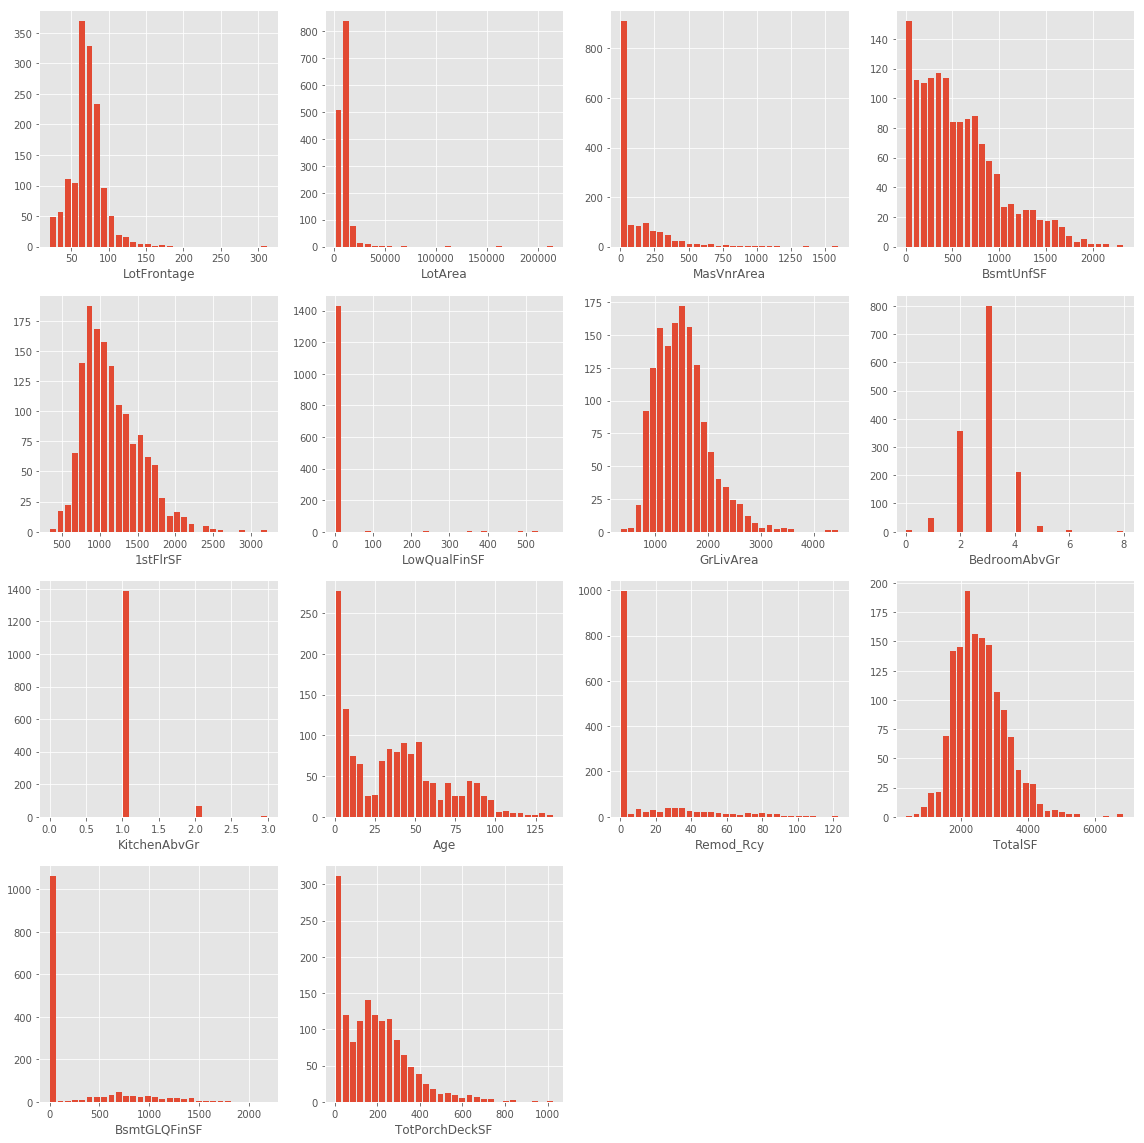

LotFrontage  skew: 1.4958712564431464 

LotArea  skew: 12.540340201730777 

MasVnrArea  skew: 2.6993776680840242 

BsmtUnfSF  skew: 0.9197649250721465 

1stFlrSF  skew: 0.8888887094274559 

LowQualFinSF  skew: 9.237981224985834 

GrLivArea  skew: 1.009163651054485 

BedroomAbvGr  skew: 0.21052029740214423 

KitchenAbvGr  skew: 4.471464194038014 

Age  skew: 0.6094277146544498 

Remod_Rcy  skew: 1.9576384879196054 

TotalSF  skew: 0.8034030528028401 

BsmtGLQFinSF  skew: 1.7123353584706504 

TotPorchDeckSF  skew: 1.102228979839781 



In [13]:
con_var = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', \
           'KitchenAbvGr', 'Age', 'Remod_Rcy', 'TotalSF', 'BsmtGLQFinSF', 'TotPorchDeckSF']
print(len(con_var))
plt.figure(figsize = (16,16))
for i, v in enumerate(con_var):
    plt.subplot(4,4,i+1)
    plt.hist(X[v], bins = 30, rwidth = 0.8) 
    plt.xlabel(v)
plt.tight_layout()
plt.show()

for v in con_var:
    print(v, " skew:",stats.skew(X[v]),"\n")
    #print(v, "kurtosis:",stats.kurtosis(X[v]),"\n")

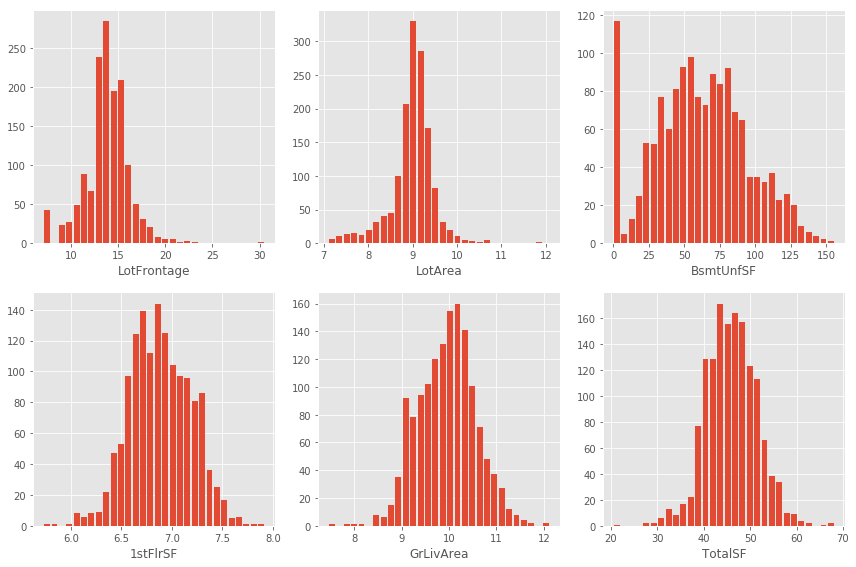

LotFrontage  skew before:  1.4958712564431464 ; skew after:  0.01977258909276789
LotArea  skew before:  12.540340201730777 ; skew after:  -0.1935087519243282
BsmtUnfSF  skew before:  0.9197649250721465 ; skew after:  0.05253444926277992
1stFlrSF  skew before:  0.8888887094274559 ; skew after:  0.002458250930004509
GrLivArea  skew before:  1.009163651054485 ; skew after:  0.013894955670682113
TotalSF  skew before:  0.8034030528028401 ; skew after:  0.042941188855827


In [20]:
fix_var = ['LotFrontage', 'LotArea', 'BsmtUnfSF', '1stFlrSF', 'GrLivArea','TotalSF']
fix_skew = X[fix_var].copy()
for var in fix_skew:
    fix_skew[var] = special.boxcox1p(fix_skew[var], stats.boxcox_normmax(fix_skew[var] + 1))
    
plt.figure(figsize = (12,8))
for i, v in enumerate(fix_var):
    plt.subplot(2,3,i+1)
    plt.hist(fix_skew[v], bins = 30, rwidth = 0.8) 
    plt.xlabel(v)
plt.tight_layout()
plt.show()

for v in fix_var:
    print(v, " skew before: ", stats.skew(X[v]), "; skew after: ", stats.skew(fix_skew[v]))

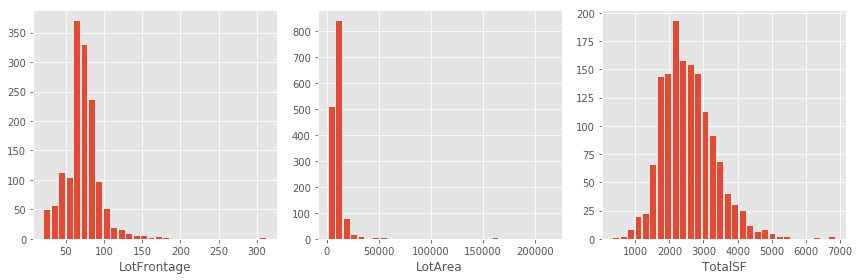

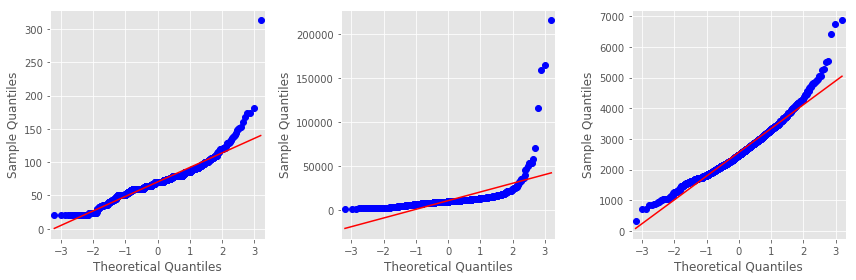

LotFrontage  skew: 1.4922163005795452 

LotFrontage kurtosis: 12.340696408863932 

LotArea  skew: 12.560985555655309 

LotArea kurtosis: 212.85479182056525 

TotalSF  skew: 0.8162399166838374 

TotalSF kurtosis: 1.7981208540846199 



In [73]:
trans_var = ['LotFrontage', 'LotArea', 'TotalSF']

plt.figure(figsize = (12,4))
for i, v in enumerate(trans_var):
    plt.subplot(1,3,i+1)
    plt.hist(X[v], bins = 30, rwidth = 0.8) 
    plt.xlabel(v)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize = (12,4))
for i, v in enumerate(trans_var):
    ax1 = fig.add_subplot(1,3,i+1)
    qqplot(X[v],line='s', ax = ax1)
plt.tight_layout()
plt.show()

for v in trans_var:
    print(v, " skew:",stats.skew(X[v]),"\n")
    print(v, "kurtosis:",stats.kurtosis(X[v]),"\n")

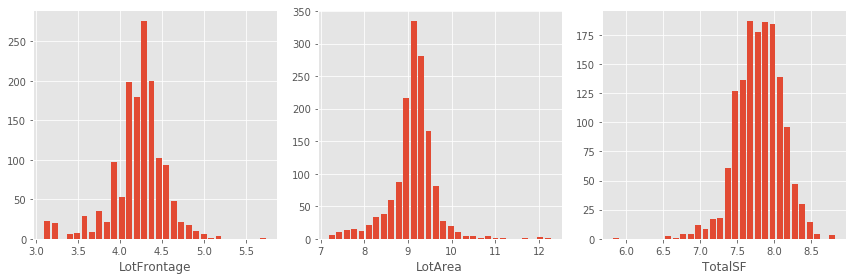

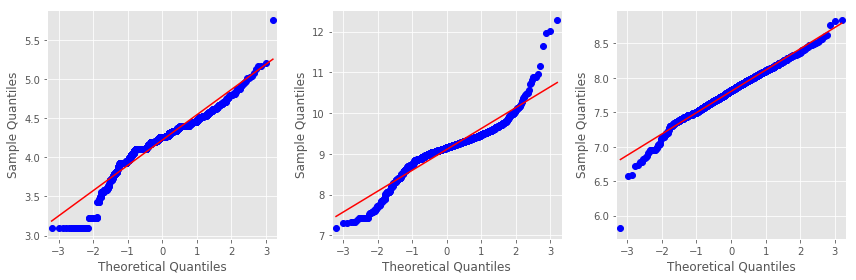

LotFrontage  skew: -0.9376242260854746 

LotFrontage kurtosis: 2.690288983035506 

LotArea  skew: -0.18109103307109672 

LotArea kurtosis: 4.730775535794716 

TotalSF  skew: -0.46467858159899245 

TotalSF kurtosis: 1.6692079228703438 



In [74]:
trans_var = 
Xt = X[trans_var].copy()
for v in trans_var:
    Xt[v] = np.log1p(X[v])

plt.figure(figsize = (12,4))
for i, v in enumerate(trans_var):
    plt.subplot(1,3,i+1)
    plt.hist(Xt[v], bins = 30, rwidth = 0.8) 
    plt.xlabel(v)
plt.tight_layout()
plt.show()

fig = plt.figure(figsize = (12,4))
for i, v in enumerate(trans_var):
    ax1 = fig.add_subplot(1,3,i+1)
    qqplot(Xt[v],line='s', ax = ax1)
plt.tight_layout()
plt.show()

for v in trans_var:
    print(v, " skew:",stats.skew(Xt[v]),"\n")
    print(v, "kurtosis:",stats.kurtosis(Xt[v]),"\n")

In [75]:
# use standardization on Xt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xt = scaler.fit_transform(Xt)
Xt = pd.DataFrame(Xt, columns = trans_var)

X[trans_var] = Xt[trans_var]
X_outlier = Xt.apply(lambda t: abs(t) > 4)

In [76]:
# number of outliers flagged per feature
print("Number of outlier per feature:", X_outlier.sum(axis = 0),"\n")
print("Number of observations with outlier features:", np.sum(X_outlier.any(axis=1)))

Number of outlier per feature: LotFrontage    1
LotArea        5
TotalSF        1
dtype: int64 

Number of observations with outlier features: 7


In [77]:
outlier_idx = X_outlier.index[ X_outlier.any(axis=1) == True ].tolist() 
X.iloc[outlier_idx,:][ con_var]

,LotFrontage,LotArea,OverallQual,TotalSF,GarageCars,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolQC,MiscVal,Re_Age,TotalFullBath,TotalHalfBath
249,0.543597,5.585007,6,1.237087,2,0,98,0,0,500,1,2,1
313,2.471980,6.174792,7,1.724971,2,0,0,0,0,0,44,4,0
335,0.729051,5.653121,5,0.951651,2,670,0,0,0,700,43,4,0
451,-0.234513,4.008486,7,0.728451,2,200,54,0,0,0,31,3,0
532,-0.888760,-1.151275,1,-6.437401,0,0,0,0,0,0,57,1,0
705,0.543597,4.956659,7,1.126101,2,380,48,0,0,0,5,3,0
933,4.738719,2.178675,7,0.261622,2,0,0,0,0,0,1,3,0
